# Homework 03

## Exercise 18 (Errors in these notes)
Let X be a Poisson random variable with mean μ representing the number of errors on a page of these notes. Each
error is independently a grammatical error with probability p or a spelling error
with probability 1 − p. If Y and Z are random variables representing the number
of grammatical and spelling errors on a page of this book, prove that Y and Z
are Poisson random variables with means μp and μ(1 − p), respectively. Also
prove that Y and Z are independent.
python: Generate X, Y, Z according to the description above with μ = 10
and p = 0.3. Generate 104 instances and verify that what you’ve proven holds.


### Solution:

Since $X$ is a poisson variable:
$$
    \Pr[X = j] = \frac{e^{-\mu}\cdot\mu^j}{j!}
$$

Since each error is independently a grammatical error with probability p or a spelling error
with probability 1−p:

$$
    \Pr[Y = k] = \sum_{j=k}^{\infty}\Pr[Y = k | X = j] \cdot \Pr[X = j]
$$
$$
    \Pr[Y = k] = \sum_{j=k}^{\infty} {j \choose k} p^k (1-p)^{j-k} \cdot \frac{e^{-\mu}\cdot\mu^j}{j!}
$$
$$
    \Pr[Y = k] = \sum_{j=k}^{\infty} \frac{j!}{k! \cdot (j-k)!} \cdot p^k (1-p)^{j-k} \cdot \frac{e^{-\mu}\cdot\mu^j}{j!}
$$

$$
    =\frac{p^k \cdot \mu^k}{k!}  \sum_{j=k}^{\infty} (1-p)^{j-k} \cdot \frac{e^{-\mu}\cdot\mu^{j-k}}{(j-k)!}
$$
$$
     =\frac{p^k \cdot \mu^k}{k!}  \cdot e^{-\mu  p} \sum_{j-k=0}^{\infty} \frac{e^{-\mu  (1-p)}\cdot(\mu(1-p))^{j-k}}{(j-k)!}
$$
$$
     \Pr[Y = k] =\frac{ e^{-\mu  p} \cdot (\mu p)^k}{k!} 
$$

To find the probability of $Z$, a similar solution should be followed:

$$
    \Pr[Z = m] = \sum_{j=m}^{\infty}\Pr[Z = m | X = j] \cdot \Pr[X = j]
$$
$$
    \Pr[Z = m] = \sum_{j=m}^{\infty} {j \choose m} (1-p)^m p^{j-m} \cdot \frac{e^{-\mu}\cdot\mu^j}{j!}
$$
$$
     \Pr[Z = m] =\frac{ e^{-\mu  (1-p)} \cdot (\mu (1-p))^m}{m!} 
$$
To prove $Y$ and $Z$ are independent we have :
$$
    \Pr[Y = k,Z = m] = \sum_{j=0}^{\infty}\Pr[Y = k, Z = m | X = j] \cdot \Pr[X = j]
$$
Since $X=Y+Z$, then $j=k+m$ :
$$
     \Pr[Y = k,Z = m]= {k+m \choose k} p^k (1-p)^m \cdot \Pr[X=k+m]
$$
$$
    \Pr[Y = k,Z = m] =  \frac{(k+m)!}{k! \cdot m!} \cdot p^k (1-p)^m \cdot \frac{e^{-\mu}\cdot\mu^{m+k}}{(m+k)!}
$$
$$
    \Pr[Y = k,Z = m] =  \frac{e^{-\mu p}(\mu p)^k }{k! } \cdot \frac{e^{-\mu (1-p)}\cdot(\mu(1-p))^{m}}{m!}=\Pr[Y = k]\Pr[Z = m]
$$

In [1]:

from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt

N = int(10000)
x = poisson.rvs(mu=10, size=10**4)
nn=np.empty((10**4,2))

for i in range(N):
    xx=int(x[i])
    y= np.random.choice(['g','s'], xx, p=[ 0.3 , 0.7 ])   #generating grammatical and spelling errors
    nn[i,0] = np.count_nonzero(y[0:] == 'g') 
    nn[i,1] = np.count_nonzero(y[0:] == 's')
    means=np.mean(nn,axis=0)
    
var_p= np.zeros((N,2))      
for k in range(N):
    var_p[k,0]=(nn[k,0]-means[0])**2  #a poisson distribution has equal expected value and variance. to show these are poisoon variables calculating mean and var.
    var_p[k,1]=(nn[k,1]-means[1])**2


variance=np.sum(var_p,axis=0)/N
var_X=np.sum((x-10)**2)/N

print('The mean of the number of grammatical erros is :', means[0])
print('The mean of the number of spelling erros is :', means[1])
print('The mean of the number of total erros is :', 10)


print('The variance of the number of grammatical erros is :', variance[0])
print('The variance of the number of spelling erros is :', variance[1])
print('The variance of the number of total erros is :', 10)

array1=nn[:,0]
array2=nn[:,1]
Cov=np.cov(array1, array2)
print('The covariance between these two arrays :', Cov[0,1])    #since covariance is near 0 then thay are independant



The mean of the number of grammatical erros is : 2.9873
The mean of the number of spelling erros is : 7.0125
The mean of the number of total erros is : 10
The variance of the number of grammatical erros is : 3.0043387099999537
The variance of the number of spelling erros is : 6.927743749999727
The variance of the number of total erros is : 10
The covariance between these two arrays : -0.007542004200420079



## Exercise 22 (Game Board)
A circular game board has K spaces numbered 0, 1, . . . K − 1. Starting at space 0 at time n = 0, a player rolls a fair six-sided
die to move a token. Hence, given the current token position Xn, the next token
position is Xn+1 = (Xn + Rn) mod K where Rn is the result of the player’s
nth roll. Find the stationary probability vector.
python: Fix K > 20 and initialise 2K different state probability vectors
pi(0), i ∈ {0, · · · , 2K − 1}. Calculate pi(103), i ∈ {0, · · · , 2K − 1} and see if it
is close to the stationary probability vector. Plot your results.
### Solution:
Markov chain:

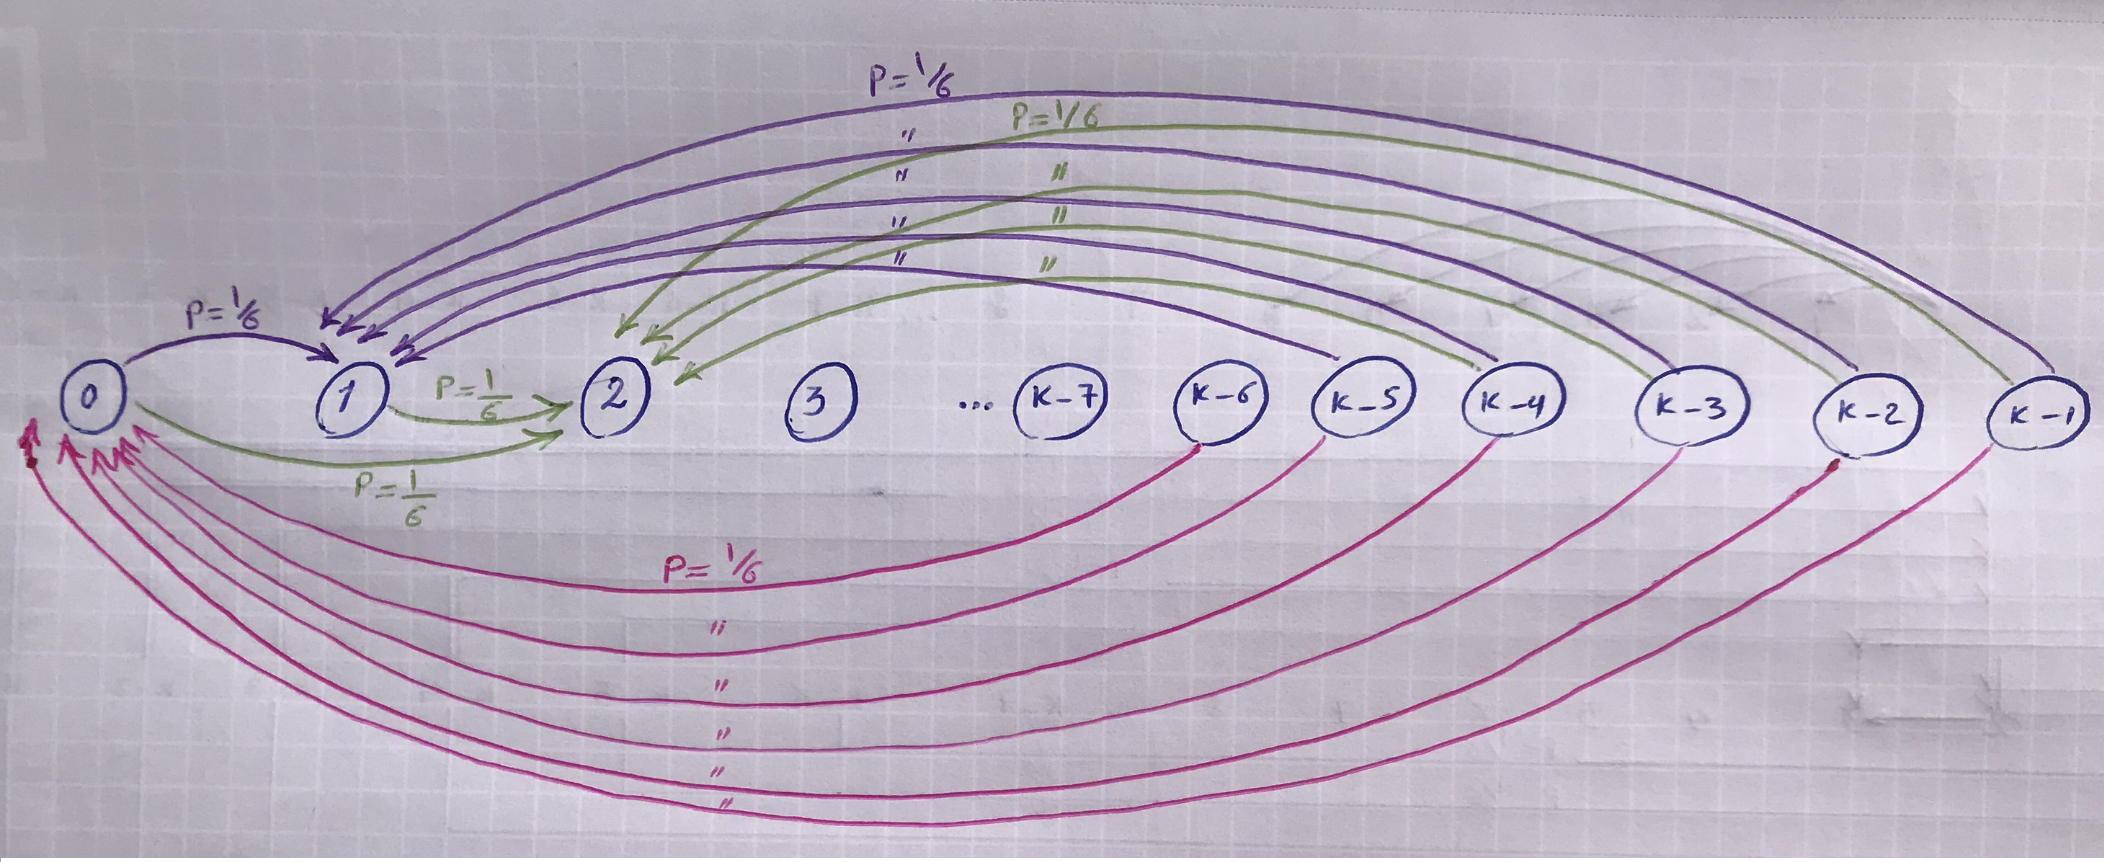



According to the theorem 
 For an irreducible, aperiodic, finite chain we have $\exists ! \pi$:
$$
    \pi P = \pi, \quad \sum_k \pi_k = 1, \pi_k \geq 0 \forall k, \quad  k \in \{0,1,\cdots,K-1\}.
$$

$$
    \pi_{0}=\frac{1}{6}(\pi_{k-6}+\pi_{k-5}+\pi_{k-4}+\pi_{k-3}+\pi_{k-2}+\pi_{k-1})
$$
$$
    \pi_{1}=\frac{1}{6}(\pi_{0}+\pi_{k-5}+\pi_{k-4}+\pi_{k-3}+\pi_{k-2}+\pi_{k-1})
$$
$$
    \pi_{2}=\frac{1}{6}(\pi_{1}+\pi_{0}+\pi_{k-4}+\pi_{k-3}+\pi_{k-2}+\pi_{k-1})
$$
$$
    \pi_{3}=\frac{1}{6}(\pi_{2}+\pi_{1}+\pi_{0}+\pi_{k-3}+\pi_{k-2}+\pi_{k-1})
$$
$$
    \pi_{4}=\frac{1}{6}(\pi_{3}+\pi_{2}+\pi_{1}+\pi_{0}+\pi_{k-2}+\pi_{k-1})
$$
$$
...
$$
$$
    \pi_{k-1}=\frac{1}{6}(\pi_{k-7}+\pi_{k-6}+\pi_{k-5}+\pi_{k-4}+\pi_{k-3}+\pi_{k-2})
$$
Where we conclude :
$$
    \pi_{0}=\pi_{1}=\pi_{2}=...=\pi_{k-4}=\pi_{k-3}=\pi_{k-2}=\pi_{k-1}
$$
according to theorem defined above:
$$
    \sum_k \pi_k = 1
$$


$$
     \pi_{0}=\pi_{1}=...=\pi_{k-2}=\pi_{k-1} = \frac{1}{k}
$$

This can be backtested with the following formulation.
$$
    \pi P = \frac{1}{6K}  \left[ 1, 1, .... \right] 
    \begin{bmatrix}
        0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & \cdots & 0 \\
        0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & \cdots & 0 \\
        \vdots & \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \cdots & 0 \\
        1 & 0 & 0 & 0 & 0 & 0 & \cdots & 1 & 1 & 1 & 1 \\
        1 & 1 & 0 & 0 & 0 & 0 & \cdots & 1 & 1 & 1 & 1 \\
        1 & 1 & 1 & 0 & 0 & 0 & \cdots & 0 & 1 & 1 & 1 \\
        1 & 1 & 1 & 1 & 0 & 0 & \cdots & 0 & 0 & 1 & 1 \\
        1 & 1 & 1 & 1 & 1 & 0 & \cdots & 0 & 0 & 0 & 1 \\
        1 & 1 & 1 & 1 & 1 & 1 & \cdots & 0 & 0 & 0 & 0 \\
    \end{bmatrix} = \frac{1}{K}  \left[ 1, 1, .... \right]  = \pi.

$$


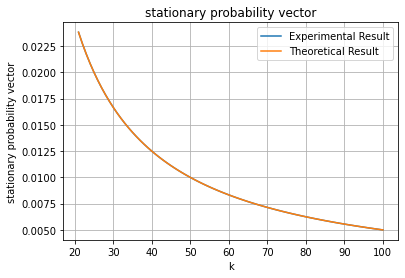

In [2]:

import numpy as np
import matplotlib.pyplot as plt

p = 1/6
k=np.arange(21,101,1)
n_vec = 2*k
n_iter = 10**3
rsm=nn=np.empty(len(n_vec))

for l in range(len(n_vec)):
    # Generate random p_0
    p_0 = np.random.random(size=(n_vec[l],n_vec[l]))
    # Normalise
    p_0 = np.transpose(np.transpose(p_0)/np.sum(p_0,axis=1))
    
    p_n_iter = np.zeros(shape=p_0.shape)
    p_prev = p_0
    
    for j in range(n_iter):
        pp=np.concatenate((p_prev,p_prev),axis=1)   #for writing pi_k equation, repeat the matrix to use window method 
        for i in range(0,n_vec[l]):
            a = pp[:,n_vec[l]+i-6:n_vec[l]+i]
            aa=np.sum(a,axis=1)*p                   #calculating each pi_k
            p_n_iter[:,i]=aa
        p_prev = p_n_iter
        
    p_avg = np.mean(p_prev,axis=0)       
    rsm[l]= np.mean(p_avg,axis=0) 
    
p_th=1/n_vec
fig1, ax1 = plt.subplots()
ax1.plot(k,rsm)
ax1.plot(k,p_th)
ax1.set_title("stationary probability vector")
ax1.set_xlabel("k")
ax1.set_ylabel("stationary probability vector")
ax1.legend(['Experimental Result', 'Theoretical Result'])
ax1.grid()


